## PROJECT 2

- [Task 1](#task_1) </n>
- [Task 2](#task_2) </n>
- [Task 3](#task_3) </n>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
import pingouin as pg

import requests
from urllib.parse import urlencode

%matplotlib inline

C:\Users\Mariia\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### TASK 1<a name = task_1></a>

In [2]:
# downloading files from Yandex disc : ['groups',  'groups_add', 'active_studs','checks']

public_key = ['https://disk.yandex.ru/d/UhyYx41rTt3clQ',
              'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ',
              'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ',
              'https://disk.yandex.ru/d/pH1q-VqcxXjsVA']  # links to the files

# Making links to download
final_link = []
for i in public_key:
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
# getting downloading links
    final_url = base_url + urlencode(dict(public_key=i))
    response = requests.get(final_url)
    df = response.json()['href']
# making links list
    download_response = requests.get(final_url)
    final_link.append(df)

In [3]:
# download files

groups = pd.read_csv(final_link[0], sep=';')
groups_add = pd.read_csv(final_link[1])
active_studs = pd.read_csv(final_link[2])
checks = pd.read_csv(final_link[3], sep=';')

In [35]:
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [36]:
# check unique and rows

groups.shape[0] == groups.id.nunique()

True

In [37]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [38]:
groups_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [39]:
# check unique and rows in groups_add set

groups_add.shape[0] == groups_add.id.nunique()

True

In [40]:
groups_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [41]:
# check duplicates in additional sets

groups_add['id'].isin(groups['id']).sum()

0

In [42]:
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [43]:
# check unique and rows in active_studs set

active_studs.shape[0] == active_studs.student_id.nunique()

True

In [44]:
active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [45]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [46]:
# check unique and rows in active_studs set

checks.shape[0] == checks.student_id.nunique()

True

In [47]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


___

We've experimented with the payment system.<br>
Two-sample hypothesis testing is a method in determining whether the differences between the two samples are statistically significant or not.<br>
- A - control
- B - treatment or test

I have four datasets:

- groups     - contains: id and A/B samples info<br>

- groups_add - contains: additional id after two days from experemnt<br>
- active_studs- contains: ids of users on the experiment day<br>
- checks      - contains: ids and receipts on the experiment day<br>


I want to check three metrics:
 - first is **CR**    - conversion rate - because we change the mechanic of the payment system, it impacts the number of new purchases from new payment users. check by **chi-squere test**<br>
 
The next two metrics show the incomes, but our feature doesn't directly impact them.<br>
 - second is **Average revenue per user** - just to be sure our changes increase the number of expensive purchases or not
 - third is **Average revenue per pay user** - just to be sure our changes increase the number of expensive purchases or not
 
Hypothesis:

- ***CR H0*** - The CR in A and B groups is the same or the payment changes don't impact to CR<br>
- ***ARPU H0***  - The ARPU in A and B groups is the same or the payment changes don't impact to ARPU<br>
- ***ARPPU H0*** - The ARPPU in A and B groups is the same or the payment changes don't impact to ARPPU<br>

#### Checking the number of users in control and test groups

In [48]:
# large disbalance between groups

display(
    groups.
    groupby('grp', as_index=False).
    size()
)

print(f'Diff between B and A groups: {59813/14671}')

,grp,size
0,A,14671
1,B,59813


Diff between B and A groups: 4.0769545361597705


In [49]:
# large disbalance between groups

display(
    groups_add.
    groupby('grp', as_index=False).
    size()
)

print(f'Diff between B and A groups: {70/22}')

,grp,size
0,A,22
1,B,70


Diff between B and A groups: 3.1818181818181817


#### Checking the number of users, visits and buying

In [50]:
# join both group's sets

groups_full = pd.concat([groups, groups_add])

In [51]:
# count all values in two sets

groups_values = groups.shape[0] + groups_add.id.nunique()

In [52]:
# checks number of values in new sets

groups_full.shape[0] == groups_full.id.nunique() == groups_values

True

In [53]:
groups_full.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [54]:
groups_full.groupby('grp', as_index=False).size()

,grp,size
0,A,14693
1,B,59883


In [55]:
# check the id in A/B groups is according to visits 'active_studs'

groups_full['id'].isin(active_studs['student_id']).sum()

8341

In [56]:
# check the id in A/B groups is according to visits 'checks'

groups_full['id'].isin(checks['student_id']).sum()

541

___

As we see we have a big disbalance between the test and control groups. <br>
And one more point the test B group is bigger than the control A group. It looks not realistic.<br>

So the first point in checking the hypothesis is: to use a test without requiring a strong balance between groups.<br>

- CR is chi-square<br>
- ARPU and ARPPU are bootstrap and u-test

In [57]:
# create df groups_full + checks
# use left join active_studs to expel mistakes with the users who didn't be active on the test days

purchase = active_studs.merge(
    groups_full, how='left', left_on='student_id', right_on='id')


# add the checks info to purchase df
# use left join because we need to save info about users who didn't get a purchase on test days but did active

purchase = purchase.merge(checks, how='left', on='student_id')

In [58]:
# create the column with acting info buying or not_buying

purchase['CR'] = purchase['rev'].fillna('not_convert')
purchase.loc[purchase['rev'] > 0, 'CR'] = 'convert'

In [59]:
# fill Nan to 0 on 'rev' column

purchase['rev'] = purchase['rev'].fillna(0)

In [60]:
purchase.head()

,student_id,id,grp,rev,CR
0,581585,581585,A,0.0,not_convert
1,5723133,5723133,A,0.0,not_convert
2,3276743,3276743,B,0.0,not_convert
3,4238589,4238589,A,0.0,not_convert
4,4475369,4475369,B,0.0,not_convert


In [61]:
# create contingency table to chi2 test

purches_fin = pd.crosstab(index=purchase['grp'],
                          columns=purchase['CR'],
                          values=purchase['CR'],
                          aggfunc='count')

In [62]:
purches_fin

CR,convert,not_convert
grp,,
A,78,1460
B,314,6489


In [63]:
purchase.shape

(8341, 5)

<AxesSubplot:xlabel='CR', ylabel='count'>

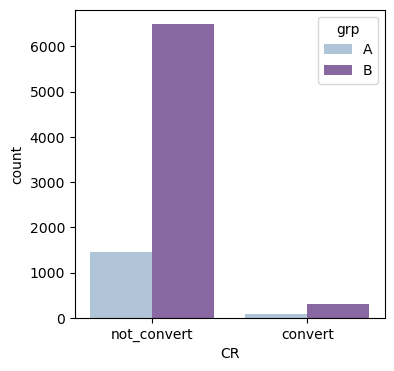

In [64]:
# vizualization Bernoulli Distribution
plt.figure(figsize=(4, 4))

sns.countplot(data=purchase, x='CR', hue='grp', palette='BuPu')

In [65]:
# apply chi-2 to CR metric: https://towardsdatascience.com/a-b-testing-with-chi-squared-test-to-maximize-conversions-and-ctrs-6599271a2c31

chi2, p, dof, ex = stats.chi2_contingency(purches_fin, correction=False)

print(f'chi2 : {chi2}', f'p-value : {p}',
      f'Degrees of freedom : {dof}', f'Expectade array : {ex}', sep='\n')

chi2 : 0.5821513741106591
p-value : 0.44547028437158964
Degrees of freedom : 1
Expectade array : [[  72.28102146 1465.71897854]
 [ 319.71897854 6483.28102146]]


In [66]:
# Check CR in groups

CR = purches_fin.convert/(purches_fin.convert+purches_fin.not_convert)
CR

grp
A    0.050715
B    0.046156
dtype: float64

**Sub-conclusion** is the conversion in two groups doesn't have the statistical difference between A-control and B-test groups.<br>
CR is the main metric to check the success of this feature because the changings don't connect with product promotion and raising average revenue.
____

Check the Revenue changes such as ARPU and ARPPU.<br>
First of all, visualization of revenue data.

Text(0.5, 1.0, 'ARPU')

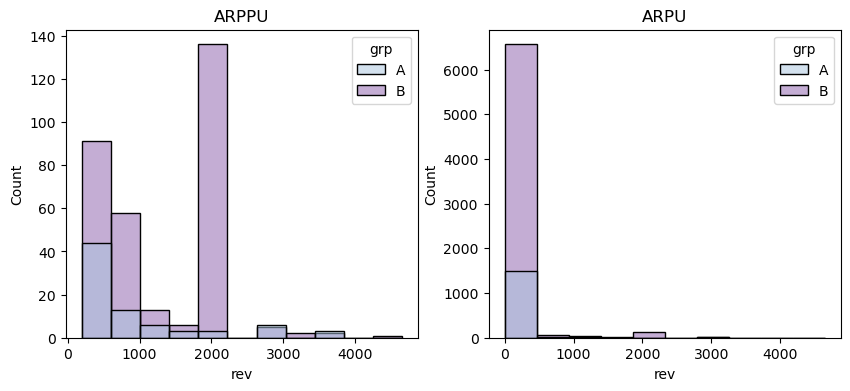

In [67]:
# check the data outliers in ARPPU and distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(data=purchase.query('rev > 0'), x='rev',
             palette="BuPu", hue='grp', ax=axes[0])
sns.histplot(data=purchase, x='rev', palette="BuPu",
             bins=10, hue='grp', ax=axes[1])

axes[0].set_title('ARPPU')
axes[1].set_title('ARPU')

<AxesSubplot:xlabel='grp', ylabel='rev'>

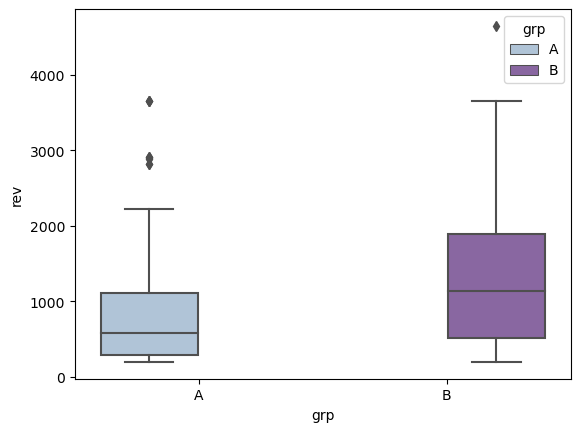

In [68]:
sns.boxplot(data=purchase[purchase.rev > 0], x='grp',
            y='rev', hue='grp', palette="BuPu")

In [69]:
# ARPU statistics

ARPU = (
    purchase.groupby('grp', as_index=False).
    agg({'rev': ['sum', 'count', 'mean', 'median']}).
    round(3)
)
ARPU

grp         rev                     
              sum count    mean median
0   A   72820.000  1538  47.347    0.0
1   B  394974.004  6803  58.059    0.0

In [70]:
# ARPU statistics of 0

ARPU_zero = (
    purchase.query('rev == 0').groupby('grp', as_index=False).
    agg({'rev': 'count'}).
    round(3)
)
ARPU_zero

,grp,rev
0,A,1460
1,B,6489


In [71]:
# ARPPU statistics

ARPPU = (
    purchase.query('rev > 0').
    groupby('grp', as_index=False).
    agg({'rev': ['count', 'mean', 'median']}).
    round(3)
)
ARPPU

grp   rev                  
      count      mean  median
0   A    78   933.590   585.0
1   B   314  1257.879  1140.0

Both metrics haven't a normal distribution.<br> 
ARPPU has the two picks concentration near 0 and 2000.<br> 
ARPU has a lot of 0 values.<br>

Hypothesis:
- ***ARPU H0***  - The ARPU in A and B groups is the same<br>
- ***ARPPU H0*** - The ARPPU in A and B groups is the same<br>

Using bootstrap to check does the Revenue changings is significant and u-test to compare results.

In [72]:
# bootstrap function

def get_bootstrap(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=100,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len,
            replace=True  # параметр возвращения
        ).values

        samples_2 = data_column_2.sample(
            boot_len,
            replace=True
        ).values

        # mean() - применяем статистику
        boot_data.append(statistic(samples_1)-statistic(samples_2))

    pd_boot_data = pd.DataFrame(boot_data)

    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])

    p_1 = stats.norm.cdf(
        x=0,
        loc=np.mean(boot_data),
        scale=np.std(boot_data)
    )
    p_2 = stats.norm.cdf(
        x=0,
        loc=-np.mean(boot_data),
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2

    # Визуализация
#    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
#    for bar in bars:
#        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
#            bar.set_facecolor('red')
#        else:
#            bar.set_facecolor('grey')
#            bar.set_edgecolor('black')
#
#    plt.style.use('ggplot')
#    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
#    plt.xlabel('boot_data')
#    plt.ylabel('frequency')
#    plt.title("Histogram of boot_data")
#    plt.show()
#
    return {"boot_data": boot_data,
            "quants": quants,
            "p_value": p_value}

In [73]:
purchase.head()

,student_id,id,grp,rev,CR
0,581585,581585,A,0.0,not_convert
1,5723133,5723133,A,0.0,not_convert
2,3276743,3276743,B,0.0,not_convert
3,4238589,4238589,A,0.0,not_convert
4,4475369,4475369,B,0.0,not_convert


In [74]:
ARPU_b = purchase.query('grp == "B"').rev
ARPU_a = purchase.query('grp == "A"').rev

u_test = pg.mwu(ARPU_b, ARPU_a, alternative='two-sided')
booted_data = get_bootstrap(ARPU_b, ARPU_a, boot_it=10000, statistic=np.mean)

print(f'Bootstrap : {booted_data["p_value"]}', f'U-test: {u_test["p-val"]}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrap : 0.04170631003623648 U-test: MWU    0.509975
Name: p-val, dtype: float64


In [75]:
ARPPU_B = purchase.query('grp == "B" and rev>0').rev
ARPPU_A = purchase.query('grp == "A" and rev>0').rev

u_test = pg.mwu(ARPPU_B, ARPPU_A, alternative='two-sided')
booted_data = get_bootstrap(ARPPU_B, ARPPU_A, boot_it=10000, statistic=np.mean)

print(f'Bootstrap : {booted_data["p_value"]}', f'U-test: {u_test["p-val"]}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrap : 1.9056091162588783e-06 U-test: MWU    0.000251
Name: p-val, dtype: float64


The ARPU results are not obvious. Comparing results of bootstrap and u-test are different.
The two factors impact to results:
- huge numbers of 0
- anomalies  around 2000

The same problem with anomalies in tests of ARPPU.

___

Testing the ARPU and ARPPU with modification.<br>
From my point of view, the anomaly is 1900.0001 revenue.<br>
I exclude users who have this check amount.

In [76]:
purchase.groupby('rev')['id'].count().sort_values(ascending=False).head(10)

rev
0.0000       7949
1900.0000      93
290.0000       70
1900.0001      35
199.0000       32
840.0000       24
990.0000       22
690.0000       17
590.0000       11
580.0000       11
Name: id, dtype: int64

In [77]:
# count the test to ARPU

ARPU_b = purchase.query('grp == "B" and rev != 1900.0001').rev
ARPU_a = purchase.query('grp == "A" and rev != 1900.0001').rev

u_test = pg.mwu(ARPU_b, ARPU_a, alternative='two-sided')
booted_data = get_bootstrap(ARPU_b, ARPU_a, boot_it=10000, statistic=np.mean)

print(f'Bootstrap : {booted_data["p_value"]}', f'U-test: {u_test["p-val"]}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrap : 0.8082043924113922 U-test: MWU    0.11406
Name: p-val, dtype: float64


In [78]:
# count the test to ARPPU

ARPPU_B = purchase.query('grp == "B" and rev != 1900.0001').rev
ARPPU_A = purchase.query('grp == "A" and rev != 1900.0001').rev

u_test = pg.mwu(ARPPU_B, ARPPU_A, alternative='two-sided')
booted_data = get_bootstrap(ARPPU_B, ARPPU_A, boot_it=10000, statistic=np.mean)

print(f'Bootstrap : {booted_data["p_value"]}', f'U-test: {u_test["p-val"]}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrap : 0.8100125449362833 U-test: MWU    0.11406
Name: p-val, dtype: float64


The results look similar to both metrics and I don't have the reasons to reject H0.

### REVIEW 1 TASK

1. The groups have an imbalance. The not robust split system can cause this kind of issue.
2. The sales or holidays could cause anomalies in ARPU and ARPPU.
3. If suppose, that the A/B test was pure, the results show that the updates should initiate. Perhaps the changes connect with the security of payment, which is why the new feature increased the number of purchases of the most popular good.
*But I don't have enough information about this test, its feature specialties, and how this experiment was designed.*

### TASK 2<a name = task_2></a>

In [2]:
import pandahouse as ph

In [3]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database': 'default',
                      'user': 'student',
                      'password': 'dpo_python_2020'
                      }

### Task 2.1

In [98]:
q_1 = '''

SELECT COUNT(DISTINCT st_id) As total_st                     /*подзапрос, считаю для уникальных студентов кол-во действий в сек. и фильтрую тех у кого уникальных действий в сек. больше чем 1*/
FROM (SELECT
            st_id,                                           
            COUNT(DISTINCT st_id) AS total_st,               /*считаю кол-во уникальных студентов, которые единовременно делают только 1 действие*/
            SUM(correct_mark) AS total_corr_task             /*суммирую кол-во правильных ответов по каждому студенту*/
    FROM    (SELECT                                          /*подзапрос, чтобы отфильтровать студентов, которые в одну и туже секунду сделали более 1 действия*/
                DISTINCT st_id AS st_id,                     /*st_id вызывается для группировки*/
                timest,                                      /*timest вызывается для группировки*/
                groupArray(subject) AS sub_list,             /*собираю в список предметы, по которым студент в одну и туже сек. дал ответ, это строка часть предворительно исслделования, не влияет на расчет*/
                COUNT(subject) AS num_subj,                  /*считаю на какое кол-во предметов уникальный студент давал ответ в одну и туже секунду*/
                COUNT(correct) AS num_task,                  /*считаю на сколько заданий уникальный студент в одну и туже сек. давал ответ*/
                COUNT(DISTINCT correct) AS num_correct,      /*считаю кол-во уникальных ответов, которые дал уникальный студент в одну и туже секунду*/
                SUM(correct) AS correct_mark                 /*считаем сколько всего правильных ответов на задание было дано учеником в определенное время*/
            FROM default.peas                    
            GROUP BY st_id, timest                           /*группирую по студентам и времени, что бы  далее исключить тех кто в одно и тоже время делает более 1 действия*/
            HAVING     num_task < 2                          /*оставляю только тех, которые делали в одну и туже секунду не более 1 действия*/
                   AND num_correct < 2 
                   AND num_subj < 2                          
            ORDER BY num_task DESC, num_correct DESC)
    GROUP BY st_id
    HAVING total_corr_task >= 20)                            /*фильтрую студентов, которые решили 20 и больше задач*/
'''

In [99]:
q_1_answer = ph.read_clickhouse(query=q_1, connection=connection_default)
q_1_answer

,total_st
0,136


### Task 2.2

In [16]:
q_2 = '''

SELECT        
            s.test_grp,
            
            ROUND(grp_sum_money/COUNT(DISTINCT s.st_id),2) AS ARPU,
            
            ROUND(sumIf(f.money, p.tot_corr_in_subj>10 AND p.subject = f.subject)/
                  uniqIf(s.st_id, p.tot_corr_in_subj>10), 2) AS ARPAU_2, -- other variant
            
            ROUND(uniqIf(f.st_id, f.money > 0)/COUNT(DISTINCT s.st_id),2) AS CR,
                  
            ROUND(uniqIf(s.st_id, f.money > 0 AND p.tot_corr_in_subj > 10)/
                              uniqIf(s.st_id, p.tot_corr_in_subj > 10 ), 2) AS CR_active,
                  
            ROUND(uniqIf(s.st_id, p.tot_corr_in_subj >= 2 AND f.subject = 'Math' AND f.money > 0 AND p.subject = 'Math')/
                uniqIf(s.st_id, p.tot_corr_in_subj >= 2 AND p.subject = 'Math'),2) AS CR_math
            
FROM default.studs AS s
LEFT JOIN (SELECT
            l.st_id AS st_id,
            l.date_task AS date_task,
            l.subject AS subject,
            tot_task_day_subj,
            cor_task_day_subj,
            total_correct,
            tot_corr_in_subj
            FROM (SELECT                                               /*подзапрос для расчета кол-ва решенных задач*/
                    st_id,                                             /*группировка по студентам*/
                    toDate(timest) AS date_task,                       /*группировка по дате*/
                    subject,                                           /*группировка по предмету*/
                    COUNT(correct) AS tot_task_day_subj,               /*кол-во решений, отправленных уникальным студентом в день по отдельному предмету*/
                    SUM(correct) AS cor_task_day_subj                  /*кол-во верных решений у студента в день по отдельному предмету*/
                FROM default.peas
                GROUP BY toDate(timest), st_id, subject) AS l
                LEFT JOIN                                              /*добавление информации о том, сколько задач за весь период решил уникальный студент*/
                        (
                        SELECT st_id, SUM(correct) AS total_correct    /*подзапрос для нахождения кол-ва правильных решений у ученика за все время теста*/
                        FROM default.peas
                        GROUP BY st_id) AS r
                ON l.st_id = r.st_id
                LEFT JOIN                                             /*добавление информации о том, сколько правильных ответов дал студент за все время по предмету*/
                    (
                    SELECT st_id, subject, SUM(correct) AS tot_corr_in_subj /*подзапрос, чтобы найти кол-во правильных ответов, которые дал студент за время эксперемента*/
                    FROM default.peas
                    GROUP BY st_id, subject) AS rr
                ON l.st_id = rr.st_id AND l.subject = rr.subject) AS p  
ON s.st_id = p.st_id
FULL JOIN default.final_project_check AS f                            /*добавляю информацию о всех покупках, чтобы учесть тех учеников, которые не решали задачи перед покупкой курса*/
            ON s.st_id = f.st_id
LEFT JOIN (SELECT                                                    /*добавляю доход от покупки курсов в каждой группе, для каждого студента*/
                s.test_grp,
                SUM(f.money) AS grp_sum_money
            FROM default.final_project_check AS f 
            LEFT JOIN default.studs AS s
                        ON s.st_id = f.st_id
            GROUP BY s.test_grp) AS sum_grp
ON s.test_grp = sum_grp.test_grp
WHERE       ((p.tot_task_day_subj <= 30)                              /*оставляю только тех, кто не оплачивал курс до начала эксперемента*/
            OR (p.tot_task_day_subj > 30 AND f.money > 0))
GROUP BY s.test_grp, grp_sum_money
'''

In [17]:
q_2_answer = ph.read_clickhouse(query=q_2, connection=connection_default)
q_2_answer

,s.test_grp,ARPU,ARPAU_2,CR,CR_active,CR_math
0,control,4586.09,8070.18,0.05,0.11,0.06
1,pilot,11508.47,16263.74,0.11,0.25,0.10


### TASK 3<a name = task_3></a>

#### Design function to recount metrics

`update(current_df, current_active_studs, current_checks)` - функция<br>
- current_df - current data
- current_active_studs -data about active users
- current_checks - info about purchases in experimental days 

need to add the three data tables into function, <br>
the function counts next options:
- table - tables with metrics per group
- groups_full - merged current and additional table
- Total_students - total students
- Total_revenue - total revenue
- purchase - summary table
- CR - CR per group
- ARPU - ARPU per group
- ARPPU - ARPPU per group

Should call exect option to show it:<br>
`update(current_df, current_active_studs, current_checks)['опция']`


In [1]:
def update(current_df, current_active_studs, current_checks):
    ''' The function returns recounting metrics after adding new data.:

        need to add the three data tables into function:
        - current_df - current data
        - current_active_studs -data about active users
        - current_checks - info about purchases in experimental days 

        the function counts next options:
        - table - tables with metrics per group
        - groups_full - merged current and additional table
        - Total_students - total students
        - Total_revenue - total revenue
        - purchase - summary table
        - CR - CR per group
        - ARPU - ARPU per group
        - ARPPU - ARPPU per group

        Should call exect option to show it:<br>
        `update(current_df, current_active_studs, current_checks)['опция']`  
    '''
    import pandas as pd
    import numpy as np

    import requests
    from urllib.parse import urlencode

    public_key = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'  # links to the files
    # Making links to download
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    # getting downloading links
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    add_df = response.json()['href']

    # read and add additional data to main data
    groups_add = pd.read_csv(add_df)
    groups_add.rename(columns={0: 'id', 1: 'grp'}, inplace=True)
    groups_full = pd.concat([current_df, groups_add])

    # create df groups_full + checks
    # use left join active_studs to expel mistakes with the users who didn't be active on the test days

    purchase = current_active_studs.merge(
        groups_full, how='left', left_on='student_id', right_on='id')

    # add the checks info to purchase df
    # use left join because we need to save info about users who didn't get a purchase on test days but did active

    purchase = purchase.merge(current_checks, how='left', on='student_id')

    # create the column with acting info buying or not_buying

    purchase['convertation'] = purchase['rev'].fillna('not_convert')
    purchase.loc[purchase['rev'] > 0, 'convertation'] = 'convert'

    # fill Nan to 0 on 'rev' column

    purchase['rev'] = purchase['rev'].fillna(0)

    # Metrics
    Total_students = purchase.student_id.nunique()
    Total_students_A = purchase.query('grp == "A"').student_id.nunique()
    Total_students_B = purchase.query('grp == "B"').student_id.nunique()

    Total_revenue = round(sum(purchase.rev), 2)
    Total_revenue_A = round(sum(purchase.query('grp == "A"').rev), 2)
    Total_revenue_B = round(sum(purchase.query('grp == "B"').rev), 2)

    CR_to_purchase = round(purchase.query('convertation == "convert"').student_id.nunique()
                           / Total_students, 2)
    CR_to_purchase_A = round(purchase.query('convertation == "convert" and grp == "A"').student_id.nunique()
                             / Total_students_A, 2)
    CR_to_purchase_B = round(purchase.query('convertation == "convert" and grp == "B"').student_id.nunique()
                             / Total_students_B, 2)

    ARPU = round(Total_revenue / Total_students, 2)
    ARPU_A = round(Total_revenue_A / Total_students_A, 2)
    ARPU_B = round(Total_revenue_B / Total_students_B, 2)

    ARPPU = round(
        Total_revenue / purchase.query('convertation == "convert"').student_id.nunique(), 2)
    ARPPU_A = round(Total_revenue_A / purchase.query(
        'convertation == "convert" and grp == "A"').student_id.nunique(), 2)
    ARPPU_B = round(Total_revenue_B / purchase.query(
        'convertation == "convert" and grp == "B"').student_id.nunique(), 2)

    table = pd.DataFrame({'General': [Total_students, Total_revenue, CR_to_purchase, ARPU, ARPPU],
                          'A_contr_grp': [Total_students_A, Total_revenue_A, CR_to_purchase_A, ARPU_A, ARPPU_A],
                          'B_contr_grp': [Total_students_B, Total_revenue_B, CR_to_purchase_B, ARPU_B, ARPPU_B]},
                         index=['num_students', 'revenue', 'CR', 'ARPU', 'ARPPU'])
    return {
        #        'summery' : print(f'Number of total unique students : {Total_students}',
        #                          f'Number of total unique students in control A group : {Total_students_A}',
        #                          f'Number of total unique students in test B group : {Total_students_B}',
        #                          '*'*20,
        #                          f'Total revenue : {Total_revenue}',
        #                          f'Total revenue in control A group: {Total_revenue_A}',
        #                          f'Total revenue in test B group: {Total_revenue_B}',
        #                          '*'*20,
        #                          f'CR into purchase : {CR_to_purchase}',
        #                          f'CR into purchase in control A group: {CR_to_purchase_A}',
        #                          f'CR into purchase in test B group: {CR_to_purchase_B}',
        #                          '*'*20,
        #                          f'ARPU : {ARPU}',
        #                          f'ARPU in control A group: {ARPU_A}',
        #                          f'ARPU in test B group: {ARPU_B}',
        #                          '*'*20,
        #                          f'ARPPU: {ARPPU}',
        #                          f'ARPPU in control A group: {ARPPU_A}',
        #                         f'ARPPU in test B group: {ARPPU_B}',
        #                         '*'*20, sep = '\n'),
        'table': table,
        'groups_full': groups_full,
        'Total_students': Total_students,
        'Total_revenue': Total_revenue,
        'purchase': purchase,
        'CR': f'CR = {CR_to_purchase}, CR_A = {CR_to_purchase_A}, CR_B = {CR_to_purchase_B}',
        'ARPU': f'ARPU = {ARPU}, ARPU_A = {ARPU_A}, ARPU_B = {ARPU_B}',
        'ARPPU': f'ARPPU = {ARPPU}, ARPPU_A = {ARPPU_A}, ARPPU_B = {ARPPU_B}'
    }

In [2]:
print(update.__doc__)

 The function returns recounting metrics after adding new data.:

        need to add the three data tables into function:
        - current_df - current data
        - current_active_studs -data about active users
        - current_checks - info about purchases in experimental days 

        the function counts next options:
        - table - tables with metrics per group
        - groups_full - merged current and additional table
        - Total_students - total students
        - Total_revenue - total revenue
        - purchase - summary table
        - CR - CR per group
        - ARPU - ARPU per group
        - ARPPU - ARPPU per group

        Should call exect option to show it:<br>
        `update(current_df, current_active_studs, current_checks)['опция']`  
    


In [89]:
update(groups, active_studs, checks)['table']

,General,A_contr_grp,B_contr_grp
num_students,8341.00,1538.00,6803.00
revenue,467794.00,72820.00,394974.00
CR,0.05,0.05,0.05
ARPU,56.08,47.35,58.06
ARPPU,1193.35,933.59,1257.88


`vizyaliz()` - функция, которую нужно вызвать чтобы визавлизировать результаты

In [5]:
def vizyaliz():
    '''
    Visualization after using update()

    Function works without parametres'''

    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd

    # saving data after recalculation
    table = update(groups, active_studs, checks)['table']
    table_df = table.copy()
    table_df = table_df.T.reset_index()
    # collecting columns names
    value = table_df.columns

    # creating grid for charts
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

    # setting space between charts
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)

    # loop to create bar chart per metrics
    for i, j in zip(axes.flatten(), value[1:]):

        sns.barplot(data=table_df, x='index', y=j, palette="BuPu", ax=i)

        # named bar-charts
        i.set_title(j, fontsize=10)
        i.bar_label(i.containers[0], fontsize=10)  # named each bar

        plt.rcParams['axes.spines.top'] = False  # remove  frame's top line
        plt.rcParams['axes.spines.right'] = False  # remove  frame's right line

    fig.delaxes(axes[2][1])  # delete 6th chart
    plt.show()

    # visualization histogram with purchases

    # calling data
    purchase = update(groups, active_studs, checks)['purchase']
    purchase_df = purchase.copy()

    plt.rcParams['axes.spines.top'] = False  # remove  frame's top line
    plt.rcParams['axes.spines.right'] = False  # remove  frame's right line

    # creating grid for charts
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    plt.subplots_adjust(left=0.1,              # setting space between charts
                        bottom=0.1,
                        right=1,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)

    # clients revenue histogram
    sns.histplot(data=purchase_df.query('convertation == "convert"'),
                 x='rev', palette="BuPu", hue='grp', ax=axes[0], bins=50)

    # users revenue histogram
    sns.histplot(data=purchase_df, x='rev',
                 palette="BuPu", hue='grp', ax=axes[1], bins=50)

    # named clients revenue histogram
    axes[0].set_title('Revenue per clients', fontsize=10)
    # amed users revenue histogram
    axes[1].set_title('Revenue per users', fontsize=10)

    plt.show()

    pass

In [6]:
print(vizyaliz.__doc__)


    Visualization after using update()

    Function works without parametres


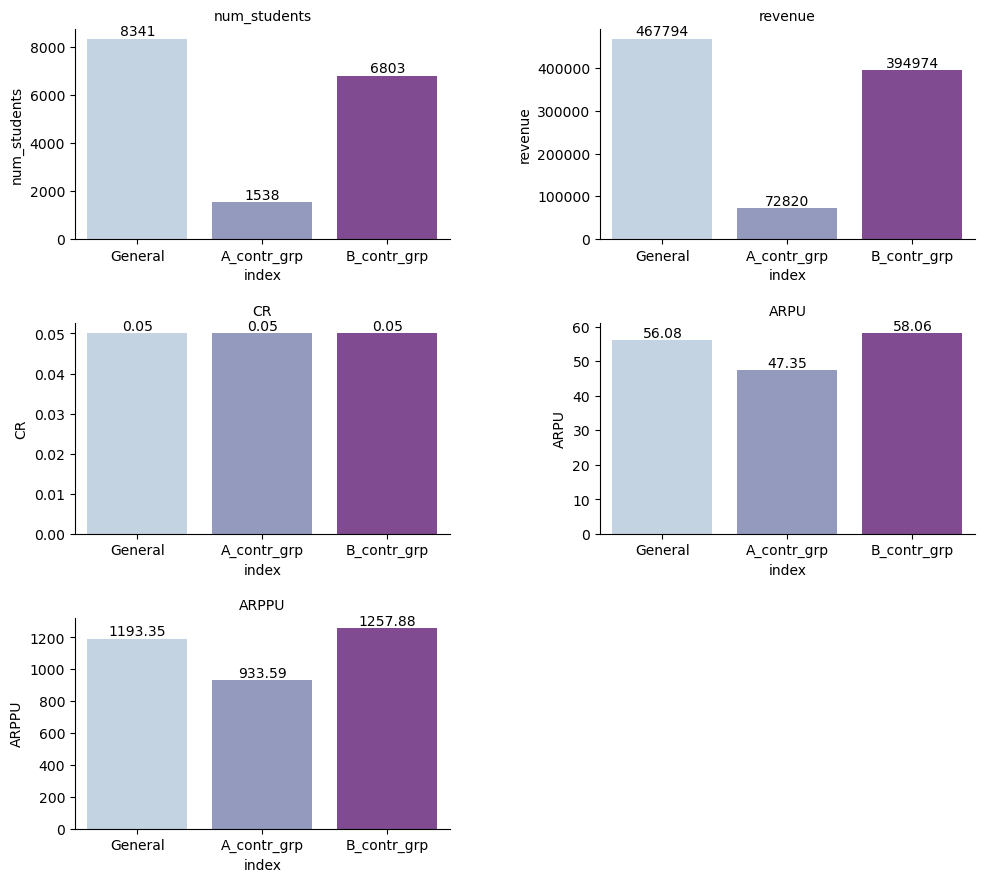

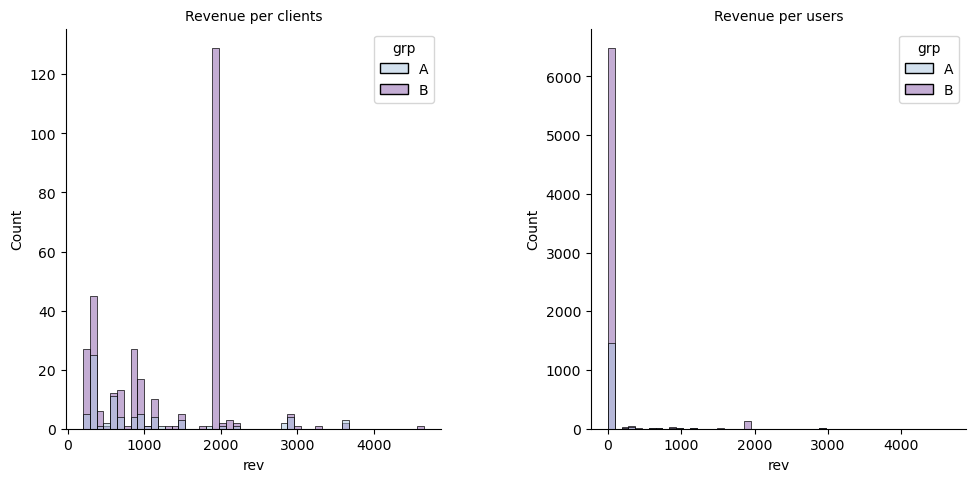

In [93]:
vizyaliz()